# **차량 공유업체의 차량 파손 여부 분류하기**

## 0.미션

* 1) 미션1 : Data Preprocessing
    - **과제 수행 목표**
        - 모델링 수행을 위해 적절한 폴더 및 파일로 **일관성 있게 정리**해야 합니다.
        - 제공된 데이터 : Car_Images.zip
            * Car_Images : 차량의 정상/파손 이미지 무작위 수집

* 2) 미션2 : CNN 모델링
    - **과제 수행 목표**
        - Tensorflow Keras를 이용하여 모델을 3개 이상 생성하세요.
            - 모델 구조와 파라미터는 자유롭게 구성하세요.
            - 단, 세부 목차에서 명시한 부분은 지켜주세요.

* 3) 미션3 : Data Augmentation & Transfer Learning
    - **과제 수행 목표**
        - 성능 개선을 위해 다음의 두가지를 시도하세요.
            * Data Augmentation을 적용하세요.(Image Generator)
            * Transfer Learning(VGG16)
* 성능 가이드
    * Accuracy : 0.34~0.74

## 1.환경설정

* **세부 요구사항**
    - 경로 설정 : 다음의 두가지 방법 중 하나를 선택하여 폴더를 준비하고 데이터를 로딩하시오.
        * 구글 드라이브 바로 밑에 project 폴더를 만들고,
        * 데이터 파일을 복사해 넣습니다.
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
        * 필요하다고 판단되는 라이브러리를 추가하세요.

### (1) 경로 설정

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### (2) 라이브러리 불러오기

In [2]:
import zipfile, os, random, shutil, glob, yaml, json
import numpy as npa
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

### (3) 데이터 불러오기

#### 1) 데이터 압축 해제

In [3]:
path = '/content/drive/MyDrive/car_sharing/'

In [ ]:
file1 = 'Car_Images.zip'
path + file1

'/content/drive/MyDrive/car_sharing/Car_Images.zip'

In [ ]:
# 압축 해제

data = zipfile.ZipFile(path+file1)

try :
    print('압축을 해제합니다.')
    data.extractall(path)
    print('압축 해제가 완료되었습니다.')
except :
    pass
    print('압축이 이미 해제되었거나 이미 폴더가 존재합니다.')

압축을 해제합니다.
압축 해제가 완료되었습니다.


#### 2) 데이터 조회

In [4]:
# 폴더별 이미지 데이터 갯수 확인

print(f"정상 차량 이미지 데이터는 {len(glob.glob(path+'normal/*'))}장 입니다.")
print(f"파손 차량 이미지 데이터는 {len(glob.glob(path+'abnormal/*'))}장 입니다.")

정상 차량 이미지 데이터는 302장 입니다.
파손 차량 이미지 데이터는 303장 입니다.


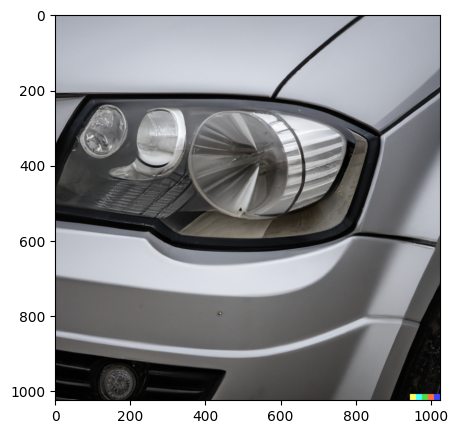

이미지 데이터의 형태는 다음과 같습니다 : (1024, 1024, 3)


In [ ]:
# 정상 차량 랜덤 이미지 확인 및 형태 확인

rand_n = random.randint( 0, len(glob.glob(path+'normal/*'))-1 )

plt.figure(figsize=(5,5))
img = plt.imread(glob.glob(path+'normal/*')[rand_n])
plt.imshow(img)
plt.show()

print(f'이미지 데이터의 형태는 다음과 같습니다 : {img.shape}')

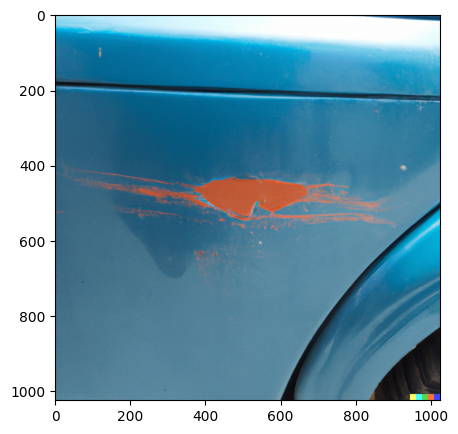

이미지 데이터의 형태는 다음과 같습니다 : (1024, 1024, 3)


In [ ]:
# 파손 차량 랜덤 이미지 확인 및 형태 확인

rand_n = random.randint( 0, len(glob.glob(path+'abnormal/*'))-1 )

plt.figure(figsize=(5,5))
img = plt.imread(glob.glob(path+'abnormal/*')[rand_n])
plt.imshow(img)
plt.show()

print(f'이미지 데이터의 형태는 다음과 같습니다 : {img.shape}')

## 2.데이터 전처리

### (1) 모델링 I용 전처리
* 모델링을 위한 데이터 구조 만들기
    * X : 이미지를 array로 변환합니다.
    * Y : 이미지 갯수만큼 normal - 0, abnormal - 1 로 array를 만듭니다.

#### 1) Y : 클래스 만들기
- **세부요구사항**
    - 전체 데이터에 대한 Y를 생성합니다.
    - normal, abnormal 데이터의 수를 확인하고 normal을 0, abnormal을 1로 지정합니다.

In [14]:
import cv2
import glob
import numpy as np

In [ ]:
# 레이블 저장용 리스트 초기화
Y = []  # 레이블을 저장할 리스트

# 정상 데이터 처리
normal_files = glob.glob(path+'normal/*')
for _ in normal_files:
    Y.append(0)  # 0은 정상 데이터에 대한 레이블

# 이상 데이터 처리
abnormal_files = glob.glob(path+'abnormal/*')
for _ in abnormal_files:
    Y.append(1)  # 1은 이상 데이터에 대한 레이블

# Y 리스트를 NumPy 배열로 변환
Y = np.array(Y)

# 레이블 수 확인
print("Y 배열 크기:", Y.shape)
print("Normal 데이터 수:", len(Y[Y == 0]))
print("Abnormal 데이터 수:", len(Y[Y == 1]))

Y 배열 크기: (605,)
Normal 데이터 수: 302
Abnormal 데이터 수: 303


In [ ]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

#### 2) X : 데이터 리스트 통합
- **세부요구사항**
    - 전체 이미지 데이터를 하나의 리스트로 통합합니다.

In [33]:
# 이미지 파일 검색 및 데이터 저장용 리스트 초기화
X = []

# 정상 데이터 처리
normal_files = glob.glob(path+'normal/*')
for file_path in normal_files:
    img = cv2.imread(file_path)
    if img is not None:
        # 이미지 데이터를 원하는 형식으로 처리 (컬러 이미지를 그대로 사용)
        img = cv2.resize(img, (256, 256))
        X.append(img)

# 이상 데이터 처리
abnormal_files = glob.glob(path+'abnormal/*')
for file_path in abnormal_files:
    img = cv2.imread(file_path)
    if img is not None:
        # 이미지 데이터를 원하는 형식으로 처리 (컬러 이미지를 그대로 사용)
        img = cv2.resize(img, (256, 256))
        X.append(img)

# X 리스트를 NumPy 배열로 변환
X = np.array(X)

# X 배열의 크기 확인
print("X 배열 크기:", X.shape)

X 배열 크기: (605, 256, 256, 3)


In [34]:
X

array([[[[136, 114,  93],
         [135, 112,  90],
         [139, 115,  90],
         ...,
         [139, 100,  60],
         [138,  98,  61],
         [136,  98,  60]],

        [[138, 117,  90],
         [141, 115,  94],
         [137, 112,  91],
         ...,
         [136,  99,  61],
         [137,  98,  61],
         [139,  98,  61]],

        [[140, 116,  94],
         [140, 115,  94],
         [140, 115,  95],
         ...,
         [137,  98,  59],
         [138, 100,  61],
         [138, 100,  60]],

        ...,

        [[ 88, 110, 136],
         [ 86, 109, 136],
         [ 86, 110, 138],
         ...,
         [255,  70,  60],
         [255,  70,  60],
         [255,  70,  60]],

        [[ 90, 112, 140],
         [ 91, 116, 142],
         [ 88, 113, 141],
         ...,
         [255,  70,  60],
         [255,  70,  60],
         [255,  70,  60]],

        [[ 84, 108, 134],
         [ 84, 108, 137],
         [ 84, 107, 136],
         ...,
         [255,  70,  60],
        

#### 3) 데이터셋 분리
- **세부요구사항**
    - 데이터 스플릿의 비율은 train set : validation set : test set = 8 : 1: 1 로 설정하세요.

In [21]:
from sklearn.model_selection import train_test_split

In [35]:
# 데이터를 Test set으로 나눔 (10%)
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.1, random_state=42)

# Test set에서 Validation set을 추출 (10%)
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.11, random_state=42)

# 각 세트의 크기 확인
print("학습 세트 크기:", x_train.shape, y_train.shape)
print("검증 세트 크기:", x_val.shape, y_val.shape)
print("테스트 세트 크기:", x_test.shape, y_test.shape)

학습 세트 크기: (484, 256, 256, 3) (484,)
검증 세트 크기: (61, 256, 256, 3) (61,)
테스트 세트 크기: (60, 256, 256, 3) (60,)


#### 4) X : image to array
- **세부요구사항**
    * 모델링을 위해서는 np.array 형태로 데이터셋을 만들어야 합니다.
    * Training set / Validation set / Test set의 X는 이미지 형태로 되어있습니다.
    * 이미지 파일을 불러와 Training data, Validation data, Test data 각각 array 형태로 변환해 봅시다.
        * 각 폴더로 부터 이미지 목록을 만들고
        * 이미지 한장씩 적절한 크기로 로딩하여 (keras.utils.load_img)
            * 이미지가 너무 크면 학습시간이 많이 걸리고, 메모리 부족현상이 발생될 수 있습니다.
            * 이미지 크기를 280 * 280 * 3 이내의 크기를 설정하여 로딩하시오.
            * array로 변환 (keras.utils.img_to_array, np.expand_dims)
        * 데이터셋에 추가합니다.(데이터셋도 array)

### (2) 모델링 II용 전처리

#### 1) 데이터셋 분리를 위한 폴더 생성
- **세부요구사항**
    - train, validation, test 데이터셋을 만들기 위해 각각 폴더를 생성하고, 하위 폴더 normal과 abnormal을 생성합니다.
        * 정상 이미지 저장소
            - project/Car_Images_train/normal/
            - project/Car_Images_val/normal/
            - project/Car_Images_test/normal/
        * 파손 이미지 저장소
            - project/Car_Images_train/abnormal/
            - project/Car_Images_val/abnormal/
            - project/Car_Images_test/abnormal/
---
- 직접 탐색기에서 폴더를 생성할 수도 있고, os 모듈을 이용하여 코드로 작성할 수도 있습니다.
    - 참고 자료 : [os document](https://docs.python.org/3/library/os.html)

In [8]:
# 각각 경로 지정
train_path = path + 'Car_Images_train'
val_path = path + 'Car_Images_val'
test_path = path + 'Car_Images_test'

In [ ]:
import os


# train 폴더
# test 폴더 만들기 os.mkdir()
if not os.path.exists(train_path):
    os.mkdir(train_path)
    os.mkdir(train_path + '/normal')
    os.mkdir(train_path + '/abnormal')


# test 폴더 만들기 os.mkdir()
if not os.path.exists(test_path):
    os.mkdir(test_path)
    os.mkdir(test_path + '/normal')
    os.mkdir(test_path + '/abnormal')


# validation 폴더 만들기
if not os.path.exists(val_path):
    os.mkdir(val_path)
    os.mkdir(val_path + '/normal')
    os.mkdir(val_path + '/abnormal')

#### 2) 각 폴더에 이미지 데이터 복사
- **세부요구사항**
    - 이전 단계에서 생성한 폴더 normal, abnormal 각각에 이미지 파일을 복사합니다.
    - 데이터 스플릿의 비율은 train set : validation set : test set = 8 : 1 : 1 로 설정하세요.

In [9]:
# 원본 이미지 파일이 있는 디렉토리
src_dir = '/content/drive/MyDrive/car_sharing/abnormal'

In [10]:
train_dir = train_path + '/abnormal'
val_dir = val_path + '/abnormal'
test_dir = test_path + '/abnormal'

In [ ]:
# 이미지 파일 목록 가져오기
image_files = os.listdir(src_dir)
random.shuffle(image_files)

# 파일 분할 비율 설정
train_ratio = 0.8
val_ratio = 0.1
test_ratio = 0.1

# 파일을 분할하여 복사
total_files = len(image_files)
train_end = int(total_files * train_ratio)
val_end = int(total_files * (train_ratio + val_ratio))

for i, image_file in enumerate(image_files):
    src_path = os.path.join(src_dir, image_file)
    if i < train_end:
        dst_dir = train_dir
    elif i < val_end:
        dst_dir = val_dir
    else:
        dst_dir = test_dir

    dst_path = os.path.join(dst_dir, image_file)
    shutil.copy(src_path, dst_path)

print("파일 복사가 완료되었습니다.")

파일 복사가 완료되었습니다.


In [11]:
src_dir_n = '/content/drive/MyDrive/car_sharing/normal'
train_dir_n = train_path + '/normal'
val_dir_n = val_path + '/normal'
test_dir_n = test_path + '/normal'

In [ ]:
# 이미지 파일 목록 가져오기
image_files = os.listdir(src_dir_n)
random.shuffle(image_files)

# 파일 분할 비율 설정
train_ratio = 0.8
val_ratio = 0.1
test_ratio = 0.1

# 파일을 분할하여 복사
total_files = len(image_files)
train_end = int(total_files * train_ratio)
val_end = int(total_files * (train_ratio + val_ratio))

for i, image_file in enumerate(image_files):
    src_path = os.path.join(src_dir_n, image_file)
    if i < train_end:
        dst_dir = train_dir_n
    elif i < val_end:
        dst_dir = val_dir_n
    else:
        dst_dir = test_dir_n

    dst_path = os.path.join(dst_dir, image_file)
    shutil.copy(src_path, dst_path)

print("파일 복사가 완료되었습니다.")

파일 복사가 완료되었습니다.


In [12]:
# 폴더별 이미지 데이터 갯수 확인

print(f"이미지 데이터는 {len(glob.glob(train_dir_n+'/*'))}장 입니다.")
print(f"이미지 데이터는 {len(glob.glob(val_dir_n+'/*'))}장 입니다.")
print(f"이미지 데이터는 {len(glob.glob(test_dir_n+'/*'))}장 입니다.")


이미지 데이터는 241장 입니다.
이미지 데이터는 30장 입니다.
이미지 데이터는 31장 입니다.


#### 3) Y : 클래스 만들기
- **세부요구사항**
    - Test용 데이터에 대한 Y를 생성합니다.
    - normal, abnormal 데이터의 수를 확인하고 normal을 0, abnormal을 1로 지정합니다.

In [15]:
# 레이블 저장용 리스트 초기화
Y = []  # 레이블을 저장할 리스트

# 정상 데이터 처리
normal_files = glob.glob(path+'normal/*')
for _ in normal_files:
    Y.append(0)  # 0은 정상 데이터에 대한 레이블

# 이상 데이터 처리
abnormal_files = glob.glob(path+'abnormal/*')
for _ in abnormal_files:
    Y.append(1)  # 1은 이상 데이터에 대한 레이블

# Y 리스트를 NumPy 배열로 변환
Y = np.array(Y)

# 레이블 수 확인
print("Y 배열 크기:", Y.shape)
print("Normal 데이터 수:", len(Y[Y == 0]))
print("Abnormal 데이터 수:", len(Y[Y == 1]))

Y 배열 크기: (605,)
Normal 데이터 수: 302
Abnormal 데이터 수: 303


#### 4) X : image to array
- **세부요구사항**
    * 모델링 II에서는 ImageDataGenerator를 이용하기 때문에 Test data에 대해서만 np.array 형태로 데이터셋을 만들어야 합니다.
    * 이미지 파일을 불러와 Test data 각각 array 형태로 변환해 봅시다.
        * 각 폴더로 부터 이미지 목록을 만들고
        * 이미지 한장씩 적절한 크기로 로딩하여 (keras.utils.load_img)
            * 이미지가 너무 크면 학습시간이 많이 걸리고, 메모리 부족현상이 발생될 수 있습니다.
            * 이미지 크기를 280 * 280 * 3 이내의 크기를 설정하여 로딩하시오.
            * array로 변환 (keras.utils.img_to_array, np.expand_dims)
        * 데이터셋에 추가합니다.(데이터셋도 array)

## 3.모델링 I
* **세부요구사항**
    * 모델을 최소 3개 이상 만들고 성능을 비교합니다.
        * 모델 학습 과정에 알맞은 보조 지표를 사용하세요.
        * 전처리 과정에서 생성한 Validation set을 적절하게 사용하세요.
        * Early Stopping을 반드시 사용하세요.
            * 최적의 가중치를 모델에 적용하세요.

### (1) 모델 1
- **세부요구사항**
    - Conv2D, MaxPooling2D, Flatten, Dense 레이어들을 이용하여 모델을 설계
    - 학습시 validation_data로 validation set을 사용하시오.
    - 반드시 Early Stopping 적용
    - 평가시, confusion matrix, accuracy, recall, precision, f1 score 등을 이용하시오.

In [16]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPool2D, Flatten, Dropout
from keras.models import Model

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix

#### 1) 구조 설계

In [17]:
# 세션 클리어
keras.backend.clear_session()

# 모델 쌓기
il = Input(shape=(256, 256, 3))
hl = Conv2D(64, (3, 3), activation='relu', padding='same')(il)
hl = Conv2D(64, (3, 3), activation='relu', padding='same')(hl)
hl = MaxPool2D()(hl)

hl = Conv2D(128, (3, 3), activation='relu', padding='same')(hl)
hl = Conv2D(128, (3, 3), activation='relu', padding='same')(hl)
hl = MaxPool2D()(hl)

hl = Conv2D(256, (3, 3), activation='relu', padding='same')(hl)
hl = Conv2D(256, (3, 3), activation='relu', padding='same')(hl)
hl = MaxPool2D()(hl)

hl = Conv2D(512, (3, 3), activation='relu', padding='same')(hl)
hl = Conv2D(512, (3, 3), activation='relu', padding='same')(hl)
hl = MaxPool2D()(hl)

hl = Conv2D(512, (3, 3), activation='relu', padding='same')(hl)
hl = Conv2D(512, (3, 3), activation='relu', padding='same')(hl)
hl = MaxPool2D()(hl)

hl = Flatten()(hl)
hl = Dense(512, activation='relu')(hl)
hl = Dropout(0.2)(hl)
ol = Dense(1, activation='sigmoid')(hl)

# 모델 선언
model = Model(il, ol)

# 컴파일
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

# 요약
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 64)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 128)     147584    
                                                             

#### 2) 학습

In [26]:
path = '/content/drive/MyDrive/car_sharing/'

In [28]:
# # 이미지 목록 저장
# img_train_list = os.listdir(path+'Car_Images_train/')
# img_valid_list = os.listdir(path+'Car_Images_val/')
# img_test_list = os.listdir(path+'Car_Images_test/')

In [30]:
# # 메모리, 처리시간을 위해서 이미지 크기 조정
# img_size = 256

# def img_to_array(img_list, img_path):
#     img_array = np.array([np.array(keras.preprocessing.image.load_img(img_path+img,
#                                    target_size=(img_size, img_size))) for img in img_list])

#     return img_array

In [36]:
# x_train = img_to_array(img_train_list, path+'Car_Images_train')
# x_test = img_to_array(img_test_list, path+'Car_Images_test')
# x_val = img_to_array(img_valid_list, path+'Car_Images_val')

In [37]:
es = EarlyStopping(monitor='val_loss', patience=10, min_delta=0, verbose=1, restore_best_weights=True)

root_path = '/content/drive/MyDrive/car_sharing/checkpoints'
# path = root_path + 'model1/{epoch:02d}-{val_loss:.4f}-{val_accuracy:.2f}.h5'
path = root_path + 'model1/save_model.h5'
mc = ModelCheckpoint(filepath=path, monitor='val_loss', save_best_only=True, save_weights_only=False)

lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.000001)

In [38]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=15, callbacks=[es, mc, lr_reduction])

Epoch 1/15
16/16 [==============================] - ETA: 0s - loss: 26.1155 - accuracy: 0.5103

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


16/16 [==============================] - 56s 1s/step - loss: 26.1155 - accuracy: 0.5103 - val_loss: 0.7657 - val_accuracy: 0.4754 - lr: 0.0010
Epoch 2/15
16/16 [==============================] - 8s 504ms/step - loss: 0.7024 - accuracy: 0.4793 - val_loss: 0.6922 - val_accuracy: 0.5246 - lr: 0.0010
Epoch 3/15
16/16 [==============================] - 7s 409ms/step - loss: 0.6978 - accuracy: 0.5393 - val_loss: 0.6939 - val_accuracy: 0.5246 - lr: 0.0010
Epoch 4/15
16/16 [==============================] - 10s 638ms/step - loss: 0.6967 - accuracy: 0.5351 - val_loss: 0.6920 - val_accuracy: 0.5410 - lr: 0.0010
Epoch 5/15
16/16 [==============================] - 7s 404ms/step - loss: 0.6999 - accuracy: 0.5682 - val_loss: 0.6931 - val_accuracy: 0.5082 - lr: 0.0010
Epoch 6/15
16/16 [==============================] - 12s 769ms/step - loss: 0.6933 - accuracy: 0.5992 - val_loss: 0.6883 - val_accuracy: 0.5246 - lr: 0.0010
Epoch 7/15
16/16 [==============================] - 7s 406ms/step - loss: 0.6937

#### 3) 성능 평가
* 평가는 confusion_matrix, classification_report 활용

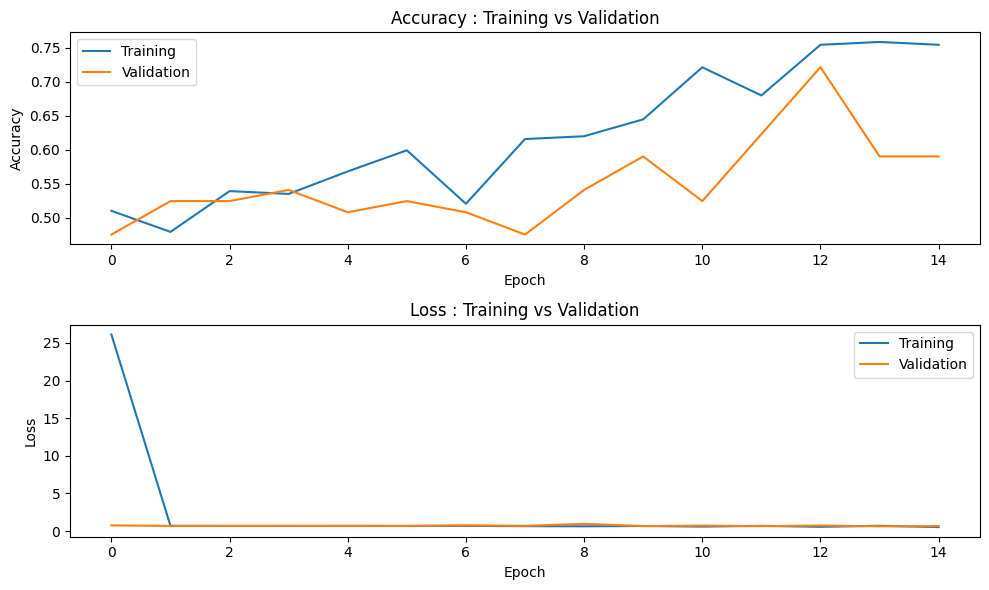

In [39]:
if not isinstance(history, dict):
    history = history.history

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Accuracy : Training vs Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)

plt.subplot(2, 1, 2)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Loss : Training vs Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.tight_layout()
plt.show()

In [40]:
model.evaluate(x_test, y_test)

2/2 [==============================] - 5s 5s/step - loss: 0.5130 - accuracy: 0.7500


[0.5129533410072327, 0.75]

In [41]:
y_pred = model.predict(x_test)
y_pred_cat = np.where(y_pred < 0.5, 0, 1)

2/2 [==============================] - 0s 158ms/step


In [42]:
print(confusion_matrix(y_test, y_pred_cat))
print(classification_report(y_test, y_pred_cat))

[[ 9 14]
 [ 1 36]]
              precision    recall  f1-score   support

           0       0.90      0.39      0.55        23
           1       0.72      0.97      0.83        37

    accuracy                           0.75        60
   macro avg       0.81      0.68      0.69        60
weighted avg       0.79      0.75      0.72        60



### (2) 모델 2
- **세부요구사항**
    - Conv2D, MaxPooling2D, Flatten, Dense 레이어들을 이용하여 모델을 설계
    - 학습시 validation_data로 validation set을 사용하시오.
    - 반드시 Early Stopping 적용
    - 평가시, confusion matrix, accuracy, recall, precision, f1 score 등을 이용하시오.

In [ ]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPool2D, Flatten

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix

#### 1) 구조 설계

#### 2) 학습

#### 3) 성능 평가
* 평가는 confusion_matrix, classification_report 활용

### (3) 모델 3
- **세부요구사항**
    - Conv2D, MaxPooling2D, Flatten, Dense 레이어들을 이용하여 모델을 설계
    - 학습시 validation_data로 validation set을 사용하시오.
    - 반드시 Early Stopping 적용
    - 평가시, confusion matrix, accuracy, recall, precision, f1 score 등을 이용하시오.

In [ ]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPool2D, Flatten

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix

#### 1) 구조 설계

#### 2) 학습

#### 3) 성능 평가
* 평가는 confusion_matrix, classification_report 활용

## 4.모델링 II
* **세부요구사항**
    - 성능을 높이기 위해서 다음의 두가지를 시도해 봅시다.
        - Data Augmentation을 통해 데이터를 증가 시킵니다.
        - 사전 학습된 모델(Transfer Learning)을 가져다 사용해 봅시다.

### (1) Data Augmentation
- **세부요구사항**
    * 모델 학습에 이용할 이미지 데이터를 증강시키세요.
    * Keras의 ImageDataGenerator를 이용
        - [ImageDataGenerator document](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator)

    * ImageDatagenerator를 이용하여 학습
        * 모델 구조는 이미 생성한 1,2,3 중 하나를 선택하여 학습


In [43]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPool2D, Flatten, Dropout


from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix

#### 1) ImageDataGenerator 생성
* ImageDataGenerator 함수 사용
    * 주요 옵션
        * rotation_range: 무작위 회전을 적용할 각도 범위
        * zoom_range: 무작위 줌을 적용할 범위 [1-zoom_range, 1+zoom_range]
        * horizontal_flip: 무작위 좌우반전을 적용할지 여부
        * vertical_flip: 무작위 상하반전을 적용할지 여부
        * rescale: 텐서의 모든 값을 rescale 값으로 나누어줌 (이 경우에는 255로 나누어서 0~1사이의 값으로 변경)

In [44]:
img_size =256
train_path = '/content/drive/MyDrive/car_sharing/Car_Images_train'
valid_path = '/content/drive/MyDrive/car_sharing/Car_Images_val'
test_path = '/content/drive/MyDrive/car_sharing/Car_Images_test'

In [45]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=90,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    shear_range=0.2
)

valid_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

#### 2) 데이터 경로에서 이미지 불러 올 준비하기
* .flow_from_directory 이용
    * 디렉토리에서 이미지를 가져와서 데이터 증강을 적용하고 batch 단위로 제공하는 generator를 생성합니다.
    * 이미지를 불러올 때 target_size로 크기를 맞추고,
    * class_mode로 이진 분류(binary)를 수행하도록 지정합니다.


In [46]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(img_size, img_size),
    class_mode='binary',
    classes=['normal', 'abnormal']
)

valid_generator = valid_datagen.flow_from_directory(
    valid_path,
    target_size=(img_size, img_size),
    class_mode='binary',
    classes=['normal', 'abnormal'],
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(img_size, img_size),
    class_mode='binary',
    classes=['normal', 'abnormal'],
    shuffle=False
)

Found 483 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 62 images belonging to 2 classes.


#### 3) 구조 설계

In [47]:

# 세션 클리어
keras.backend.clear_session()

# 모델 쌓기
il = Input(shape=(img_size, img_size, 3))
hl = Conv2D(64, (3, 3), activation='relu', padding='same')(il)
hl = Conv2D(64, (3, 3), activation='relu', padding='same')(hl)
hl = MaxPool2D()(hl)

hl = Conv2D(128, (3, 3), activation='relu', padding='same')(hl)
hl = Conv2D(128, (3, 3), activation='relu', padding='same')(hl)
hl = MaxPool2D()(hl)

hl = Conv2D(256, (3, 3), activation='relu', padding='same')(hl)
hl = Conv2D(256, (3, 3), activation='relu', padding='same')(hl)
hl = MaxPool2D()(hl)

hl = Conv2D(512, (3, 3), activation='relu', padding='same')(hl)
hl = Conv2D(512, (3, 3), activation='relu', padding='same')(hl)
hl = MaxPool2D()(hl)

hl = Conv2D(512, (3, 3), activation='relu', padding='same')(hl)
hl = Conv2D(512, (3, 3), activation='relu', padding='same')(hl)
hl = MaxPool2D()(hl)

hl = Flatten()(hl)
hl = Dense(512, activation='relu')(hl)
hl = Dropout(0.2)(hl)
ol = Dense(1, activation='sigmoid')(hl)

# 모델 선언
model = Model(il, ol)

# 컴파일
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

# 요약
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 64)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 128)     147584    
                                                             

#### 4) 학습

In [48]:
es = EarlyStopping(monitor='val_loss', patience=10, min_delta=0, verbose=1, restore_best_weights=True)

root_path = '/content/drive/MyDrive/car_sharing/checkpoints'
# path = root_path + 'model1/{epoch:02d}-{val_loss:.4f}-{val_accuracy:.2f}.h5'
path = root_path + 'model1/save_model.h5'
mc = ModelCheckpoint(filepath=path, monitor='val_loss', save_best_only=True, save_weights_only=False)

lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.000001)

In [49]:
# history = model.fit(train_generator, validation_data=valid_generator, epochs=10000, callbacks=[es, mc, lr_reduction])
history = model.fit(train_generator, validation_data=valid_generator, epochs=50, callbacks=[es, mc])

Epoch 1/50
16/16 [==============================] - ETA: 0s - loss: 0.7576 - accuracy: 0.4638

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


16/16 [==============================] - 100s 6s/step - loss: 0.7576 - accuracy: 0.4638 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/50
16/16 [==============================] - 37s 2s/step - loss: 0.7481 - accuracy: 0.4928 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/50
16/16 [==============================] - 33s 2s/step - loss: 0.6934 - accuracy: 0.4990 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/50
16/16 [==============================] - 34s 2s/step - loss: 0.6932 - accuracy: 0.5072 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 5/50
16/16 [==============================] - 36s 2s/step - loss: 0.6933 - accuracy: 0.5010 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 6/50
16/16 [==============================] - 33s 2s/step - loss: 0.6930 - accuracy: 0.4990 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 7/50
16/16 [==============================] - 37s 2s/step - loss: 0.6924 - accuracy: 0.5300 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 8/50
16/16 [============

#### 5) 성능 평가
* 평가는 confusion_matrix, classification_report 활용

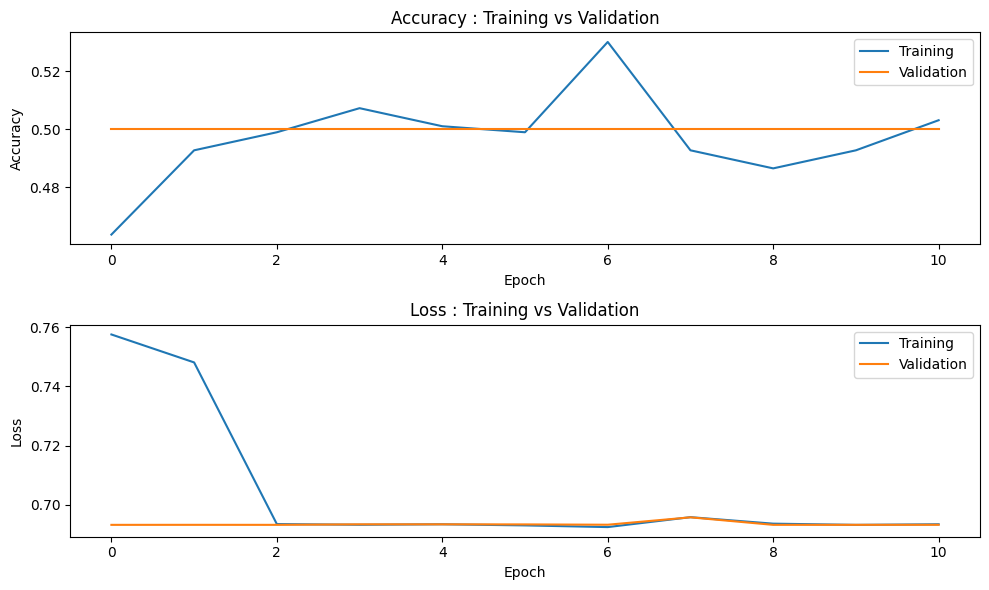

In [50]:
if not isinstance(history, dict):
    history = history.history

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Accuracy : Training vs Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)

plt.subplot(2, 1, 2)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Loss : Training vs Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.tight_layout()
plt.show()

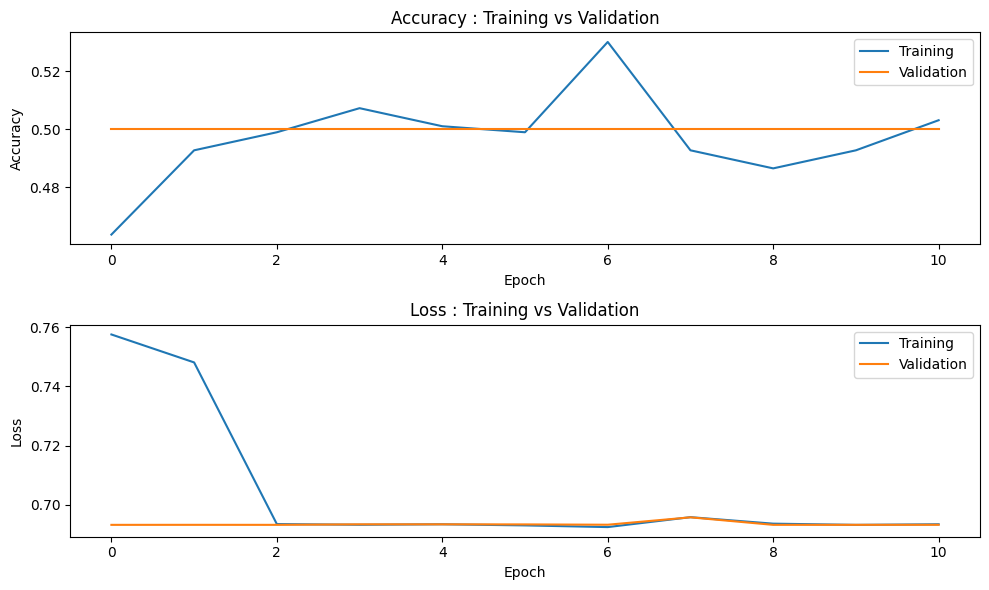

In [51]:
if not isinstance(history, dict):
    history = history.history

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Accuracy : Training vs Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)

plt.subplot(2, 1, 2)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Loss : Training vs Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.tight_layout()
plt.show()

In [53]:
y_pred = model.predict(x_test)
y_pred_cat = np.where(y_pred < 0.5, 0, 1)
print(confusion_matrix(y_test, y_pred_cat))
print(classification_report(y_test, y_pred_cat))

2/2 [==============================] - 0s 113ms/step
[[23  0]
 [37  0]]
              precision    recall  f1-score   support

           0       0.38      1.00      0.55        23
           1       0.00      0.00      0.00        37

    accuracy                           0.38        60
   macro avg       0.19      0.50      0.28        60
weighted avg       0.15      0.38      0.21        60



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [54]:
model.evaluate(x_test, y_test)

2/2 [==============================] - 1s 137ms/step - loss: 3.6263 - accuracy: 0.3833


[3.6263442039489746, 0.38333332538604736]

### (2) Transfer Learning
- **세부요구사항**
    * VGG16 모델은 1000개의 클래스를 분류하는 데 사용된 ImageNet 데이터셋을 기반으로 사전 학습된 가중치를 가지고 있습니다.
        * 따라서 이 모델은 이미지 분류 문제에 대한 높은 성능을 보입니다.
        * 이 모델은 보통 전이학습(transfer learning)에서 기본적으로 사용되며, 특히 대규모 데이터셋이 없을 때는 기본 모델로 사용되어 fine-tuning을 수행합니다.
    * VGG16 함수로 부터 base_model 저장


In [55]:
from tensorflow.keras.applications import VGG16

In [56]:
img_size=256

#### 1) VGG16 불러와서 저장하기
* include_top=False로 설정하여 분류기를 제외하고 미리 학습된 가중치 imagenet을 로드합니다.
* .trainable을 False로 설정하여 모델의 모든 레이어들을 Frozen 시켜 가중치를 고정합니다.


In [57]:
base_model = VGG16(weights='imagenet',
                   include_top=False,
                   input_shape=(img_size, img_size, 3))
base_model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                              

#### 2) VGG16과 연결한 구조 설계
* VGG16을 불러와서 Flatten, Dense 등으로 레이어 연결하기

In [58]:
keras.backend.clear_session()

base_model = VGG16(weights='imagenet',
                   include_top=False,
                   input_shape=(img_size, img_size, 3))

hl = Flatten()(base_model.output)
hl = Dense(512, activation='relu')(hl)
ol = Dense(1, activation='sigmoid')(hl)

model = Model(base_model.input, ol)

In [ ]:
# block5 부터 학습 시키기
trainable = False
for idx, layer in enumerate(model.layers):
    if layer.name.startswith('block5'):
        trainable = True
    layer.trainable = trainable

In [ ]:
model.summary()

In [59]:
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

#### 3) 학습
- **세부요구사항**
    - 모델 학습 과정에 알맞은 보조 지표를 사용하세요.
    - 데이터
        - Data Augmentation에서 생성한 ImageDataGenerator를 학습에 이용하세요.
        - Early Stopping을 반드시 사용하세요.
        - 최적의 가중치를 모델에 적용하세요.

In [60]:
es = EarlyStopping(monitor='val_loss', patience=10, min_delta=0, verbose=1, restore_best_weights=True)

root_path = '/content/drive/MyDrive/car_sharing/checkpoints/'
# path = root_path + 'model2/{epoch:02d}-{val_loss:.4f}-{val_accuracy:.2f}.h5'
path = root_path + 'VGG16_Dense/save_model.h5'
mc = ModelCheckpoint(filepath=path, monitor='val_loss', save_best_only=True, save_weights_only=False)

lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.000001)

In [61]:
history = model.fit(train_generator, validation_data=valid_generator, epochs=50, callbacks=[es, mc, lr_reduction])

Epoch 1/50
16/16 [==============================] - ETA: 0s - loss: 3.7124 - accuracy: 0.4617

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


16/16 [==============================] - 50s 3s/step - loss: 3.7124 - accuracy: 0.4617 - val_loss: 0.6924 - val_accuracy: 0.4333 - lr: 0.0010
Epoch 2/50
16/16 [==============================] - 37s 2s/step - loss: 0.9029 - accuracy: 0.5362 - val_loss: 0.6968 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 3/50
16/16 [==============================] - 46s 3s/step - loss: 0.8881 - accuracy: 0.5321 - val_loss: 0.6859 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 4/50
16/16 [==============================] - 35s 2s/step - loss: 0.7194 - accuracy: 0.4907 - val_loss: 0.6902 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 5/50
16/16 [==============================] - 40s 3s/step - loss: 0.6913 - accuracy: 0.5404 - val_loss: 0.6768 - val_accuracy: 0.5333 - lr: 0.0010
Epoch 6/50
16/16 [==============================] - 35s 2s/step - loss: 0.8300 - accuracy: 0.4969 - val_loss: 0.7334 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 7/50
16/16 [==============================] - 34s 2s/step - loss: 0.6961 - accuracy: 0.

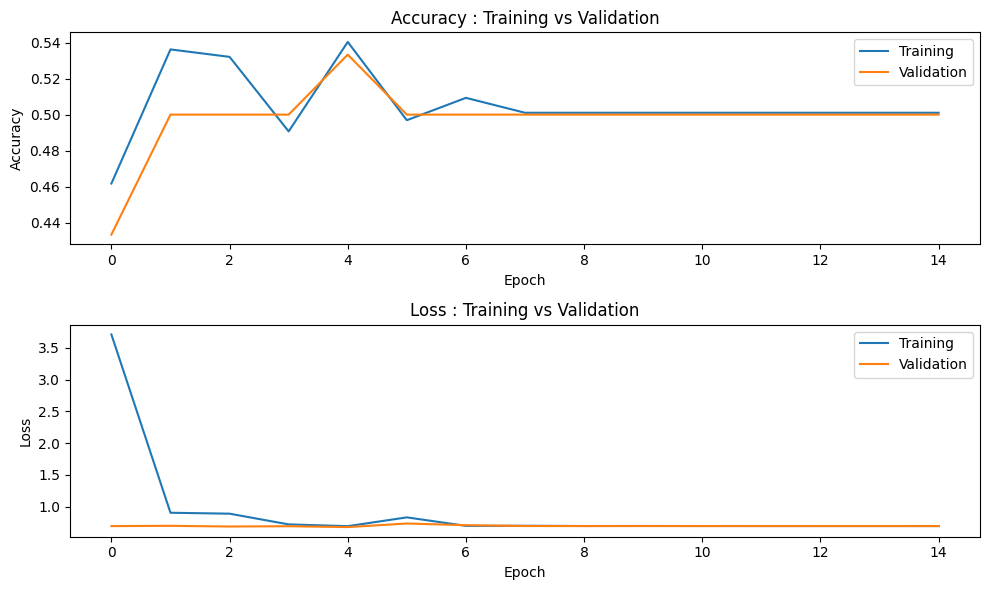

In [62]:
if not isinstance(history, dict):
    history = history.history

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Accuracy : Training vs Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)

plt.subplot(2, 1, 2)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Loss : Training vs Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.tight_layout()
plt.show()

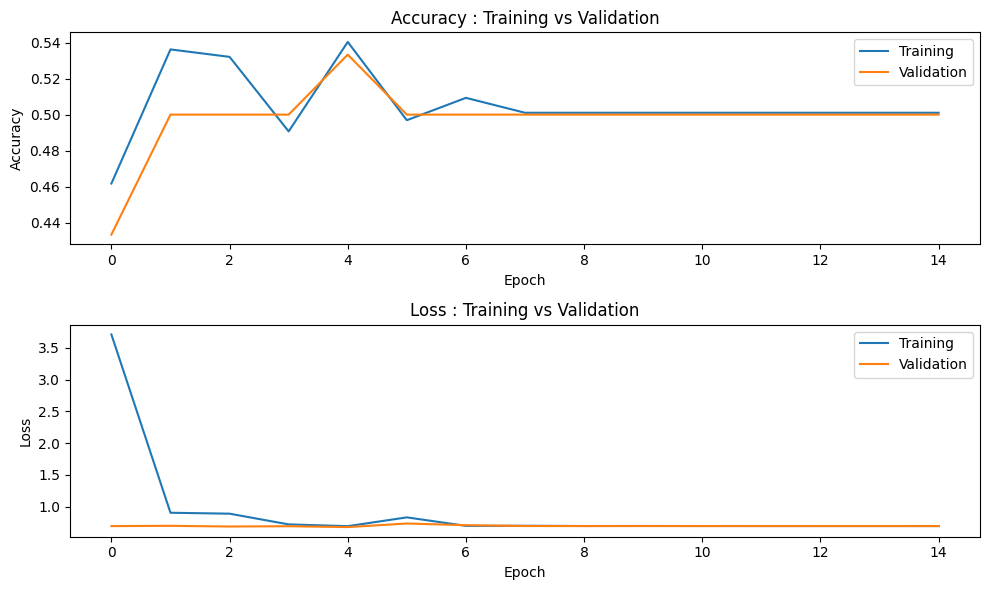

In [63]:
if not isinstance(history, dict):
    history = history.history

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Accuracy : Training vs Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)

plt.subplot(2, 1, 2)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Loss : Training vs Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.tight_layout()
plt.show()

#### 4) 성능 평가

In [64]:
y_pred = model.predict(test_generator)
y_pred_cat = np.where(y_pred < 0.5, 0, 1)
print(confusion_matrix(test_generator.classes, y_pred_cat))
print(classification_report(test_generator.classes, y_pred_cat))

model.evaluate(test_generator)

2/2 [==============================] - 14s 13s/step
[[ 3 28]
 [ 4 27]]
              precision    recall  f1-score   support

           0       0.43      0.10      0.16        31
           1       0.49      0.87      0.63        31

    accuracy                           0.48        62
   macro avg       0.46      0.48      0.39        62
weighted avg       0.46      0.48      0.39        62

2/2 [==============================] - 5s 2s/step - loss: 0.6772 - accuracy: 0.4839


[0.6771838068962097, 0.4838709533214569]

In [76]:
y_pred = model.predict(test_generator)
y_pred_cat = np.where(y_pred < 0.5, 0, 1)
print(confusion_matrix(test_generator.classes, y_pred_cat))
print(classification_report(test_generator.classes, y_pred_cat))

model.evaluate(test_generator)

2/2 [==============================] - 3s 1s/step
[[ 3 28]
 [ 4 27]]
              precision    recall  f1-score   support

           0       0.43      0.10      0.16        31
           1       0.49      0.87      0.63        31

    accuracy                           0.48        62
   macro avg       0.46      0.48      0.39        62
weighted avg       0.46      0.48      0.39        62

2/2 [==============================] - 3s 1s/step - loss: 0.6772 - accuracy: 0.4839


[0.6771838068962097, 0.4838709533214569]

In [ ]:
# 성능 가이드

# Accuracy : 0.34~0.74

In [66]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# VGG16 모델을 불러옵니다.
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# 모든 레이어의 가중치를 고정합니다.
for layer in base_model.layers:
    layer.trainable = False

# Flatten 레이어를 추가합니다.
x = Flatten()(base_model.output)

# 하나 이상의 Dense 레이어를 추가합니다. 이 예제에서는 1024개의 뉴런을 가진 하나의 레이어를 추가합니다.
x = Dense(1024, activation='relu')(x)

# 최종 출력 레이어를 추가합니다. 이진 분류의 경우, 뉴런 수는 1이며 활성화 함수는 sigmoid를 사용합니다.
output = Dense(1, activation='sigmoid')(x)

# 새로운 모델을 생성합니다.
transfer_model = Model(inputs=base_model.input, outputs=output)

# 모델을 컴파일합니다.
transfer_model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=Adam())

# 모델 구조를 출력합니다.
transfer_model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0   

In [69]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

# 데이터 증강을 위한 ImageDataGenerator를 생성합니다.
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
train_generator = train_datagen.flow_from_directory(
    directory=train_path,
    target_size=(256,256),
    class_mode='binary',
    batch_size=64)

valid_generator = valid_datagen.flow_from_directory(
    directory=valid_path,
    target_size=(256,256),
    class_mode='binary',
    batch_size=64)


# 모델 학습 과정에 사용할 보조 지표를 정의합니다.
# 이 예시에서는 정확도와 손실을 모니터링합니다.
metrics = ['accuracy', 'loss']



Found 483 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [70]:
# Early Stopping 콜백을 설정합니다.
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# ModelCheckpoint 콜백을 설정하여 최적 가중치를 저장합니다.
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, save_weights_only=True, monitor='val_loss')

# 모델을 학습합니다.
history = transfer_model.fit(
    train_generator,
    epochs=20, # 적절한 에포크 횟수를 설정하세요.
    validation_data=valid_generator,
    callbacks=[early_stopping, model_checkpoint],
)


# 모델 학습 과정을 시각화합니다.
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()


Epoch 1/100
8/8 [==============================] - 57s 6s/step - loss: 6.2329 - accuracy: 0.5528 - val_loss: 0.5912 - val_accuracy: 0.8667
Epoch 2/100
8/8 [==============================] - 35s 4s/step - loss: 1.4247 - accuracy: 0.7681 - val_loss: 0.5558 - val_accuracy: 0.8833
Epoch 3/100
8/8 [==============================] - 34s 4s/step - loss: 0.7203 - accuracy: 0.8282 - val_loss: 0.3252 - val_accuracy: 0.9167
Epoch 4/100
8/8 [==============================] - 37s 5s/step - loss: 0.4455 - accuracy: 0.8447 - val_loss: 0.4431 - val_accuracy: 0.8500
Epoch 5/100
8/8 [==============================] - 45s 6s/step - loss: 0.2579 - accuracy: 0.8903 - val_loss: 0.3655 - val_accuracy: 0.8833
Epoch 6/100
8/8 [==============================] - 46s 6s/step - loss: 0.2591 - accuracy: 0.8903 - val_loss: 0.4815 - val_accuracy: 0.8500
Epoch 7/100
8/8 [==============================] - 35s 5s/step - loss: 0.2502 - accuracy: 0.9193 - val_loss: 0.2053 - val_accuracy: 0.9167
Epoch 8/100
8/8 [==========

KeyboardInterrupt: ignored

1/1 [==============================] - 1s 952ms/step


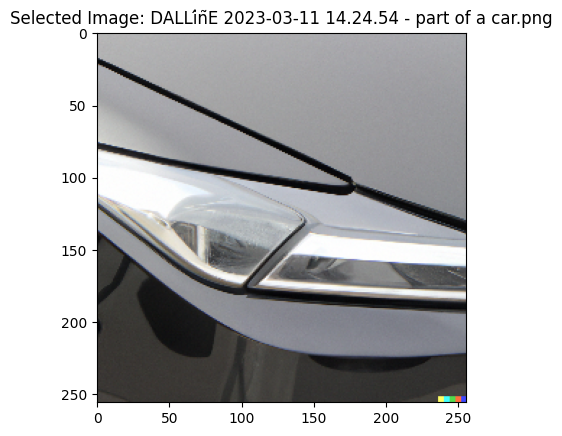

예측 결과: normal
실제 결과: normal


In [71]:
import os
import random
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

# 테스트 이미지 파일 경로 설정
test_dir = '/content/drive/MyDrive/car_sharing/Car_Images_test'

# 정상과 비정상 클래스 설정
class_names = ['normal', 'abnormal']

# 무작위 이미지 선택
random_class = random.choice(class_names)
random_image = random.choice(os.listdir(os.path.join(test_dir, random_class)))

# 선택한 이미지 파일 경로
image_path = os.path.join(test_dir, random_class, random_image)

# 이미지를 모델에 입력할 수 있는 형식으로 변환
img = load_img(image_path, target_size=(256, 256))  # VGG16 기반으로 훈련한 모델을 위해 크기 조정
img = img_to_array(img)
img = np.expand_dims(img, axis=0)  # 배치 차원 추가
img = img / 255.0  # 정규화

# 모델을 사용하여 이미지 분류
result = transfer_model.predict(img)

# 예측 결과 출력
predicted_class = class_names[int(round(result[0][0])) - 1]

# 실제 결과 추출 (파일 이름에서 클래스 추출)
actual_class = random_class

# 이미지 출력
plt.imshow(img[0])
plt.title(f'Selected Image: {random_image}')
plt.show()

# 예측 결과와 실제 결과 출력
print(f'예측 결과: {predicted_class}')
print(f'실제 결과: {actual_class}')


In [72]:
import os
import random
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

# 테스트 이미지 파일 경로 설정
test_dir = '/content/drive/MyDrive/car_sharing/Car_Images_test'

# 정상과 비정상 클래스 설정
class_names = ['normal', 'abnormal']

# 잘못된 예측을 저장할 리스트
misclassified_images = []

# 정상에서 비정상으로 잘못 판단된 이미지 찾기
for image_file in os.listdir(os.path.join(test_dir, 'normal')):
    image_path = os.path.join(test_dir, 'normal', image_file)

    # 이미지를 모델에 입력할 수 있는 형식으로 변환
    img = load_img(image_path, target_size=(256, 256))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img / 255.0

    # 모델을 사용하여 이미지 분류
    result = transfer_model.predict(img)
    predicted_class = class_names[int(round(result[0][0])) - 1]
    actual_class = 'normal'

    # 잘못된 예측을 확인하고 리스트에 추가
    if predicted_class == 'abnormal':
        misclassified_images.append((image_path, actual_class, predicted_class))

# 비정상에서 정상으로 잘못 판단된 이미지 찾기
for image_file in os.listdir(os.path.join(test_dir, 'abnormal')):
    image_path = os.path.join(test_dir, 'abnormal', image_file)

    # 이미지를 모델에 입력할 수 있는 형식으로 변환
    img = load_img(image_path, target_size=(256, 256))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img / 255.0

    # 모델을 사용하여 이미지 분류
    result = transfer_model.predict(img)
    predicted_class = class_names[int(round(result[0][0])) - 1]
    actual_class = 'abnormal'

    # 잘못된 예측을 확인하고 리스트에 추가
    if predicted_class == 'normal':
        misclassified_images.append((image_path, actual_class, predicted_class))

# 임의로 잘못 판단된 이미지 선택
random_misclassified_image = random.choice(misclassified_images)

1/1 [==============================] - 0s 23ms/step


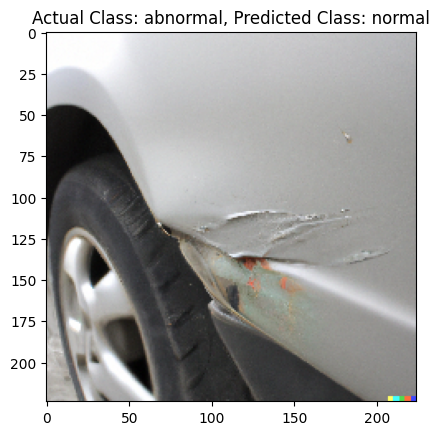

Accuracy: 96.77%


In [79]:
# 이미지 출력
image_path, actual_class, predicted_class = random_misclassified_image
img = load_img(image_path, target_size=(224, 224))
plt.imshow(img)
plt.title(f'Actual Class: {actual_class}, Predicted Class: {predicted_class}')
plt.show()
# 정확도 계산
total_misclassified = len(misclassified_images)
total_test_images = len(os.listdir(os.path.join(test_dir, 'normal'))) + len(os.listdir(os.path.join(test_dir, 'abnormal')))
accuracy = 1.0 - (total_misclassified / total_test_images)
print(f'Accuracy: {accuracy:.2%}')

